# Bike Sharing Dataset Linear Model

### Step 1: Reading and Understanding Data

In [320]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# To supress warnings

import warnings
warnings.filterwarnings('ignore')

In [321]:
# Read the data and check the head of the dataset

bike = pd.read_csv(r"C:\Users\Akash\Downloads\day (1).csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [322]:
# Checking the shape of dataframe

bike.shape

(730, 16)

In [323]:
# Get the info about the columns

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [324]:
# describing the columns of dataframe

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [325]:
# Check for the null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [326]:
# renaming the columns for better readability

bike.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity'}, inplace=True)

In [327]:
# Dropping the unnecessary columns
# The column `instant` is only the index of the rows.
# The column `dteday` has the dates that can be compensated by the columns `month` and `year`
# The columns `casual` and `registered` seems to be the breakup by the category for `cnt` column

bike.drop(['casual', 'registered', 'instant', 'dteday'], axis=1, inplace=True)

In [328]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [329]:
# Encoding/mapping the columns

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.month = bike.month.map({1:'january', 2:'february', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'august',
                             9:'september', 10:'october', 11:'november', 12:'december'})
bike.weekday = bike.weekday.map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday'})
bike.weathersit = bike.weathersit.map({1:'Clear', 2:'Mist', 3:'Light_Snow_Rain', 4:'Heavy_Snow_Rain'})

In [330]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the Data

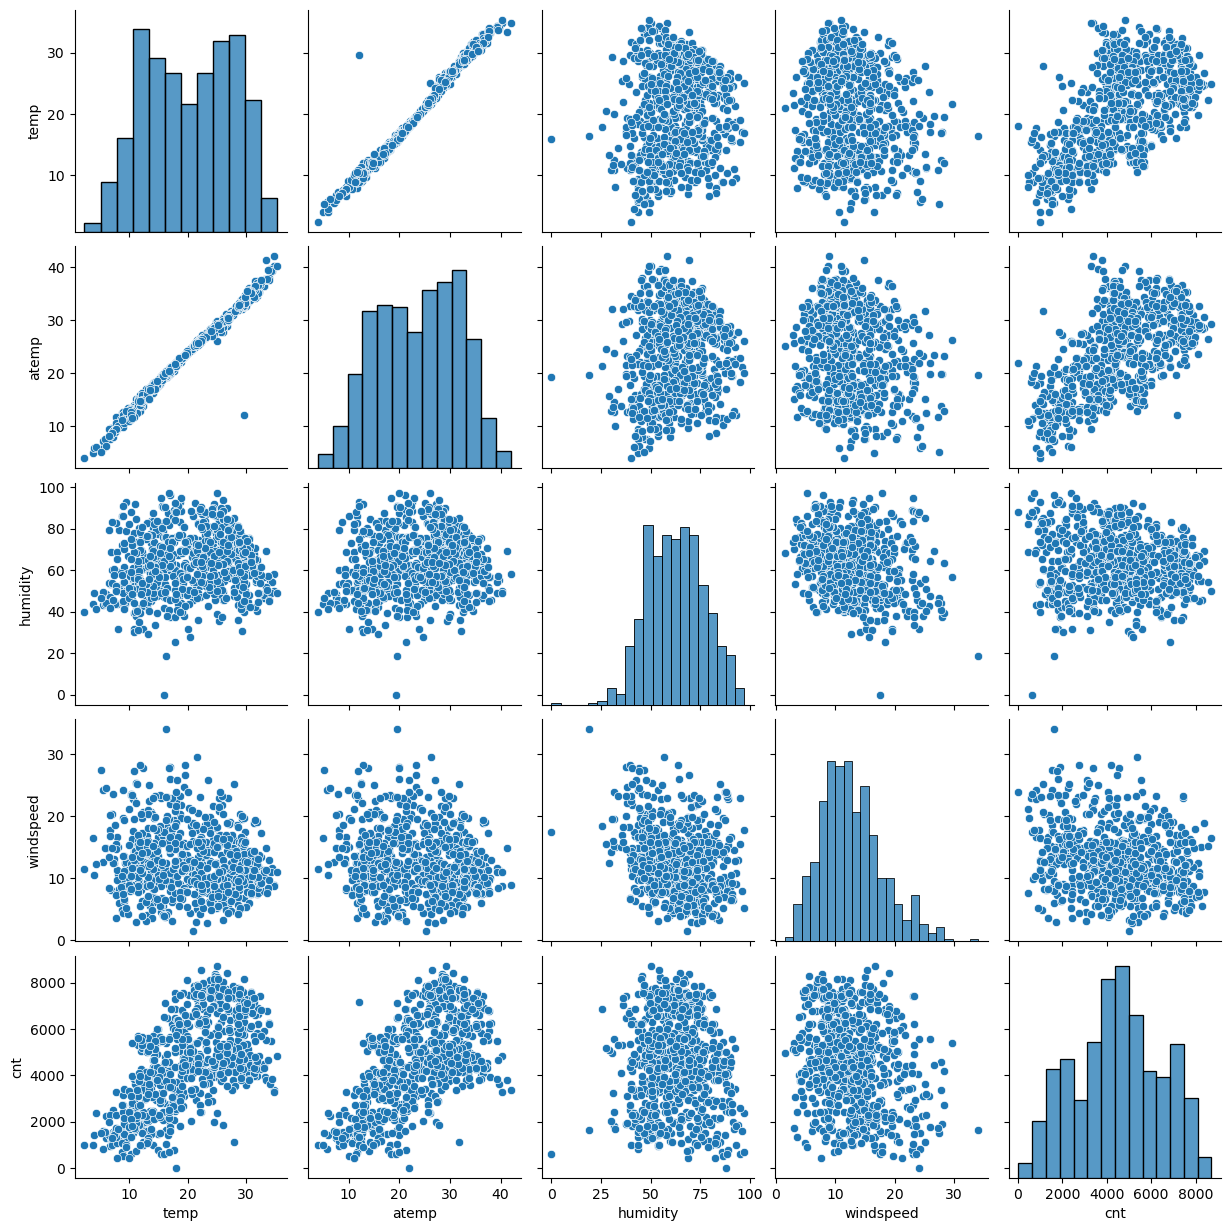

In [331]:
# visualising the numerical data

sns.pairplot(bike, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

<Axes: xlabel='year', ylabel='cnt'>

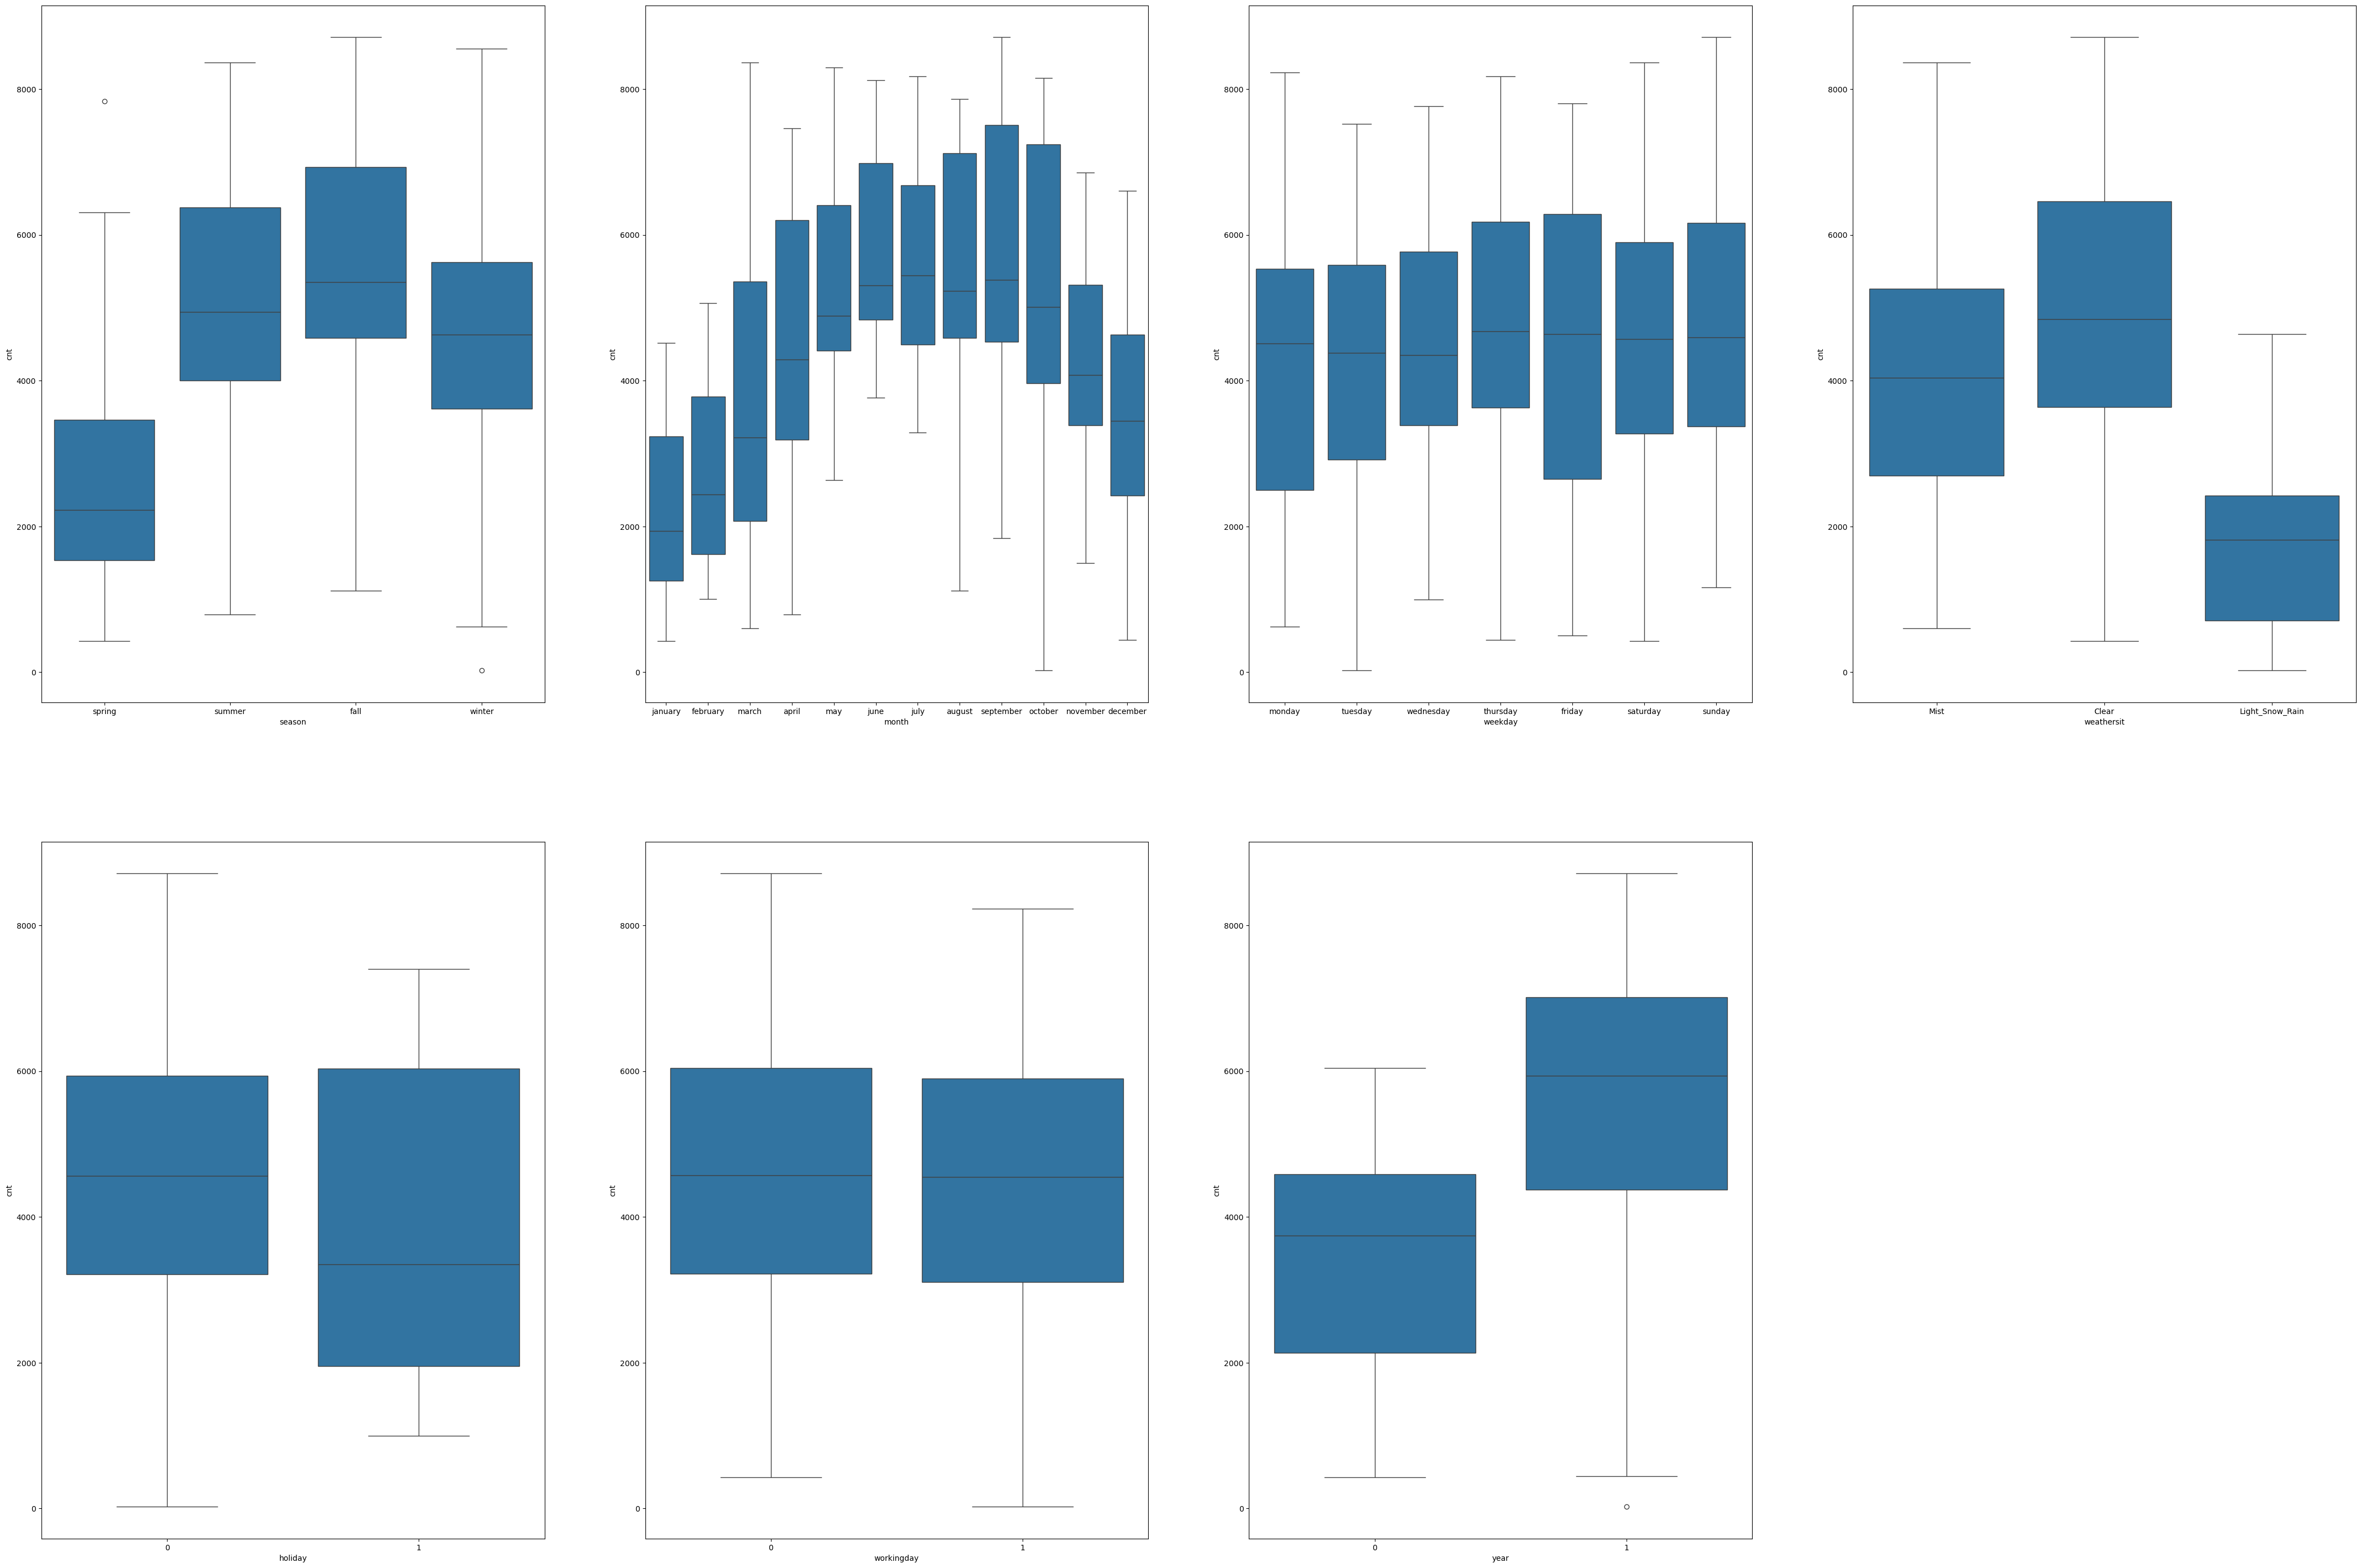

In [332]:
# visualising the categorical columns

plt.figure(figsize=(54,36))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(2,4,2)
sns.boxplot(x='month', y='cnt', data=bike)

plt.subplot(2,4,3)
sns.boxplot(x='weekday', y='cnt', data=bike)

plt.subplot(2,4,4)
sns.boxplot(x='weathersit', y='cnt', data=bike)

plt.subplot(2,4,5)
sns.boxplot(x='holiday', y='cnt', data=bike)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.subplot(2,4,7)
sns.boxplot(x='year', y='cnt', data=bike)



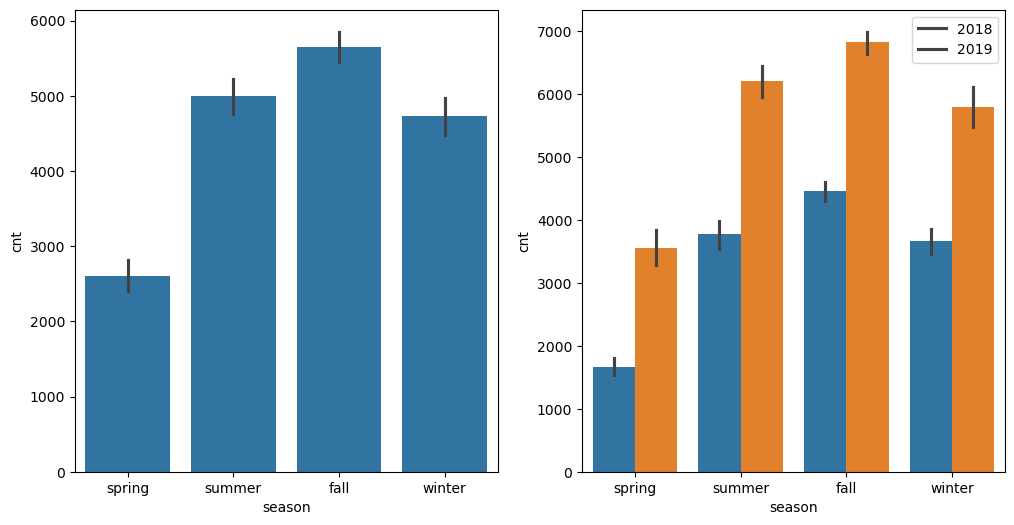

In [333]:
# visualising the column `season`

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='season', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='season', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- Fall season seems to have attracted more booking.
- Bookings seems to have been increased in each season from 2018 to 2019.

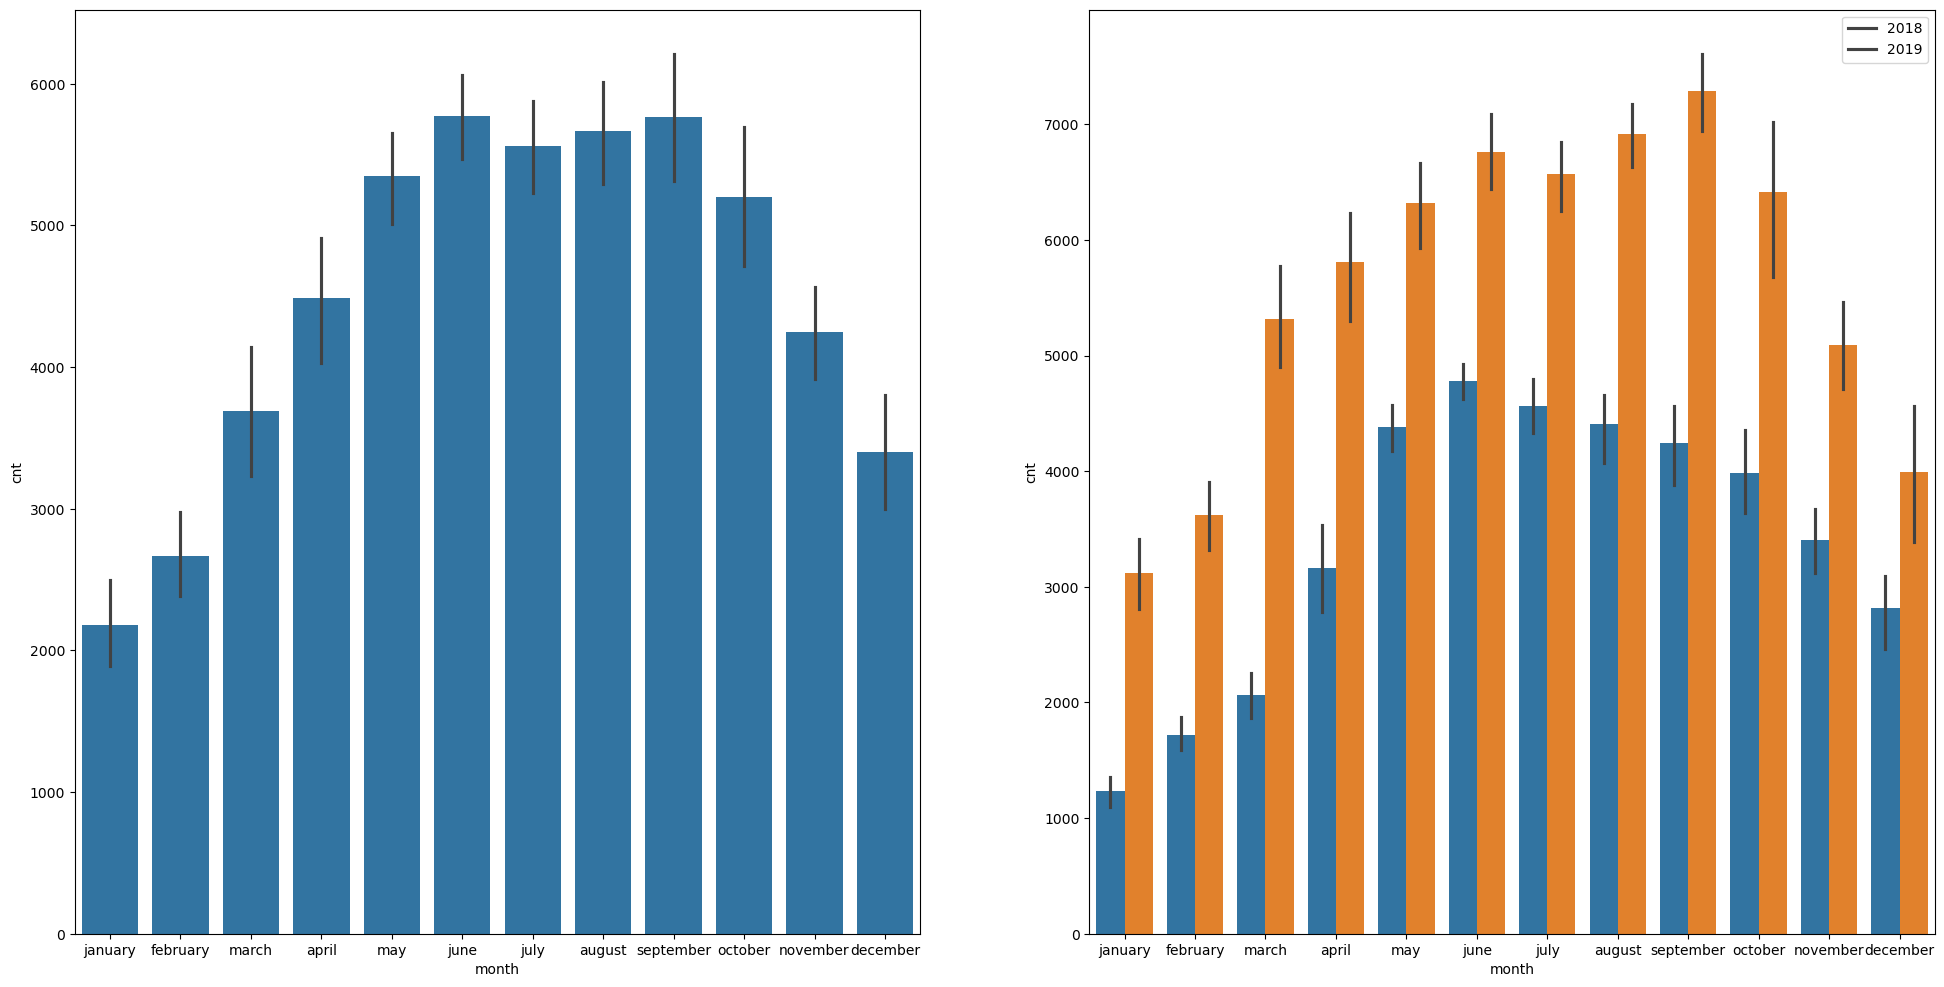

In [334]:
# visualising the column `month`

plt.figure(figsize=(24,12))

plt.subplot(1,2,1)
sns.barplot(x='month', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='month', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- The bookings are the most from the month of may to october. And have been decreased by the end of the year.
- The number of bookings have been increased from 2018 to 2019.

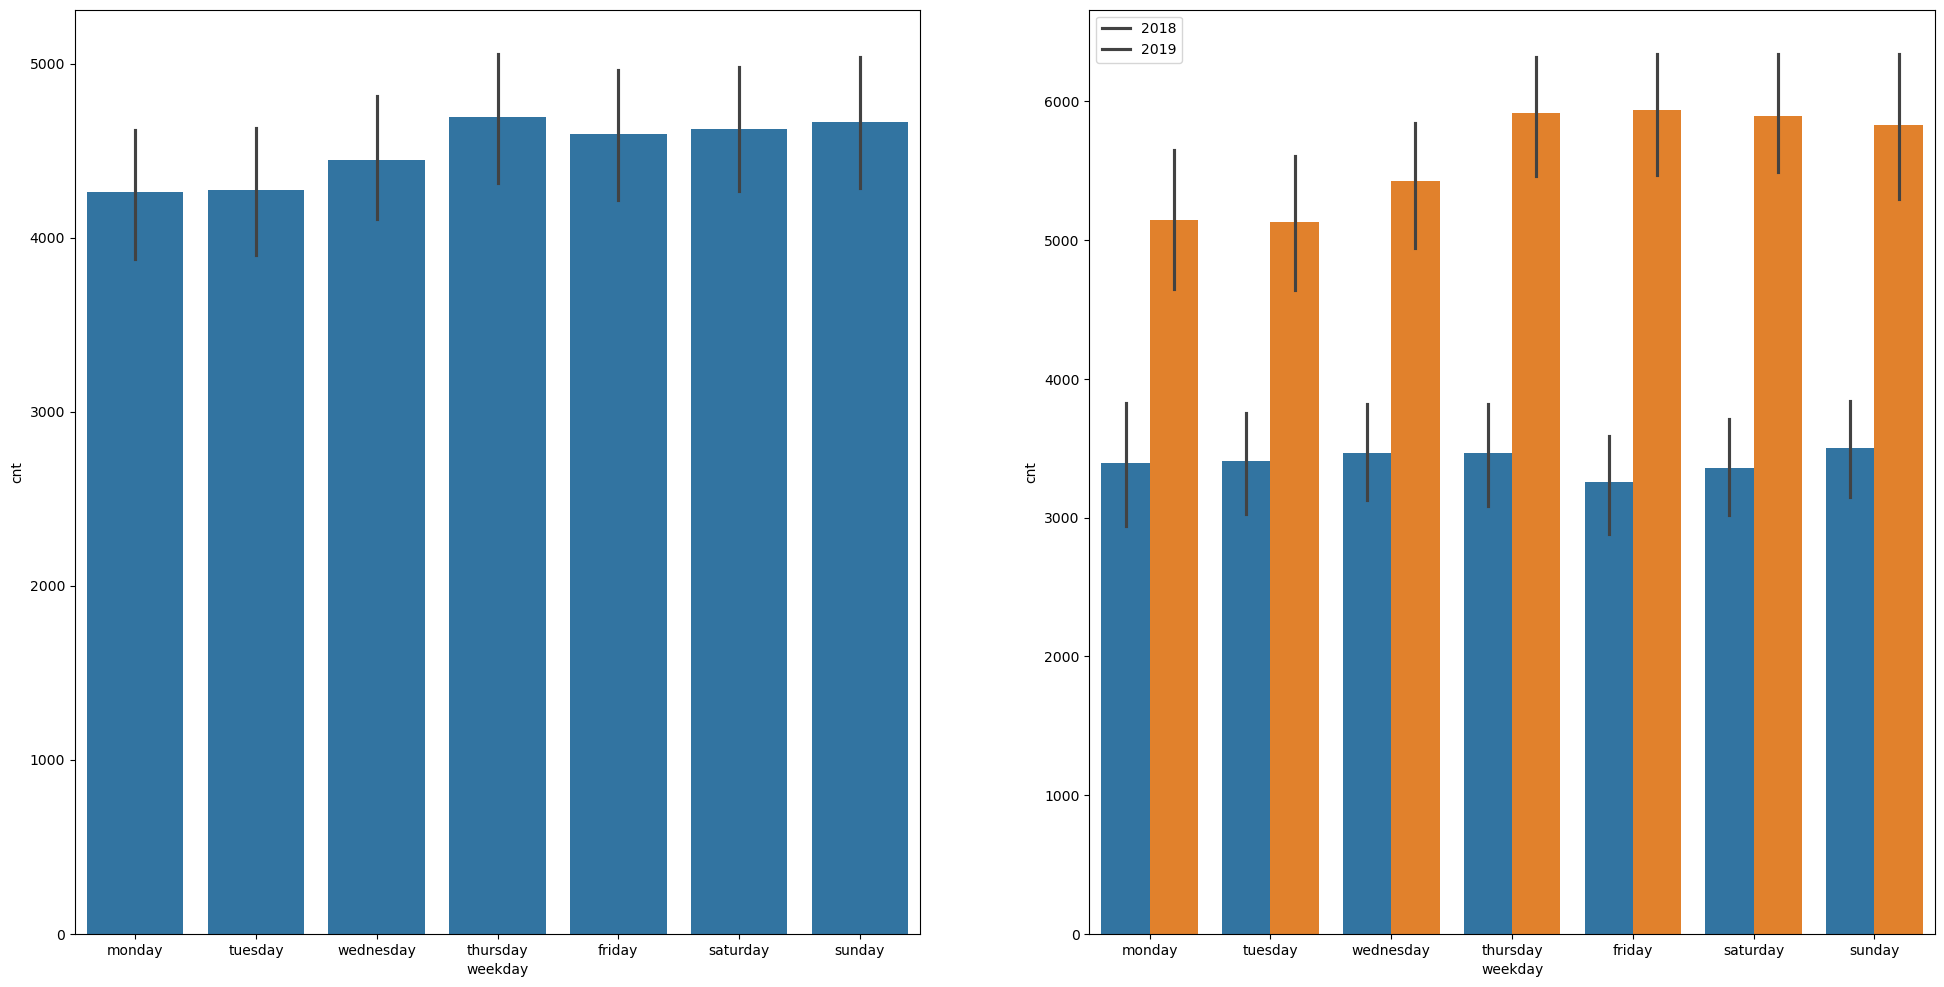

In [335]:
# visualising the column `weekday`

plt.figure(figsize=(24,12))

plt.subplot(1,2,1)
sns.barplot(x='weekday', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='weekday', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- The booking has been most on Thursday, Friday, Saturday and Sunday.

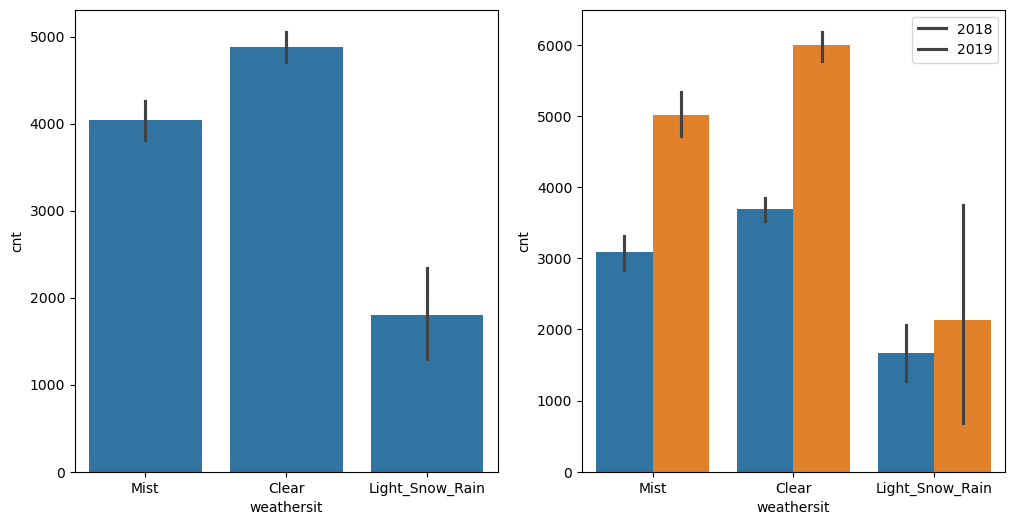

In [336]:
# visualising the column `weathersit`

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='weathersit', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='weathersit', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- The bookings seem to be the most in the Clear weather.
- And have been increased in the next year by each season.

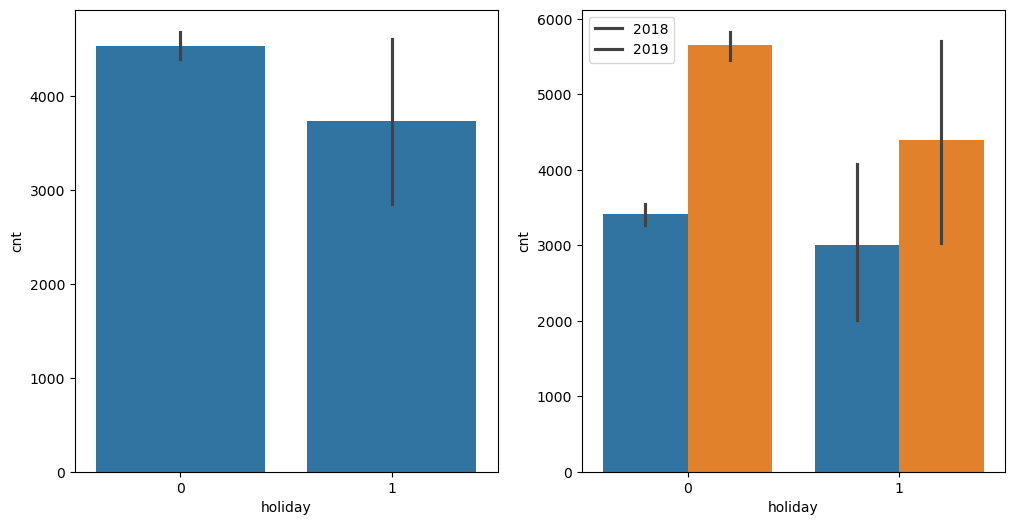

In [337]:
# visualising the column `holiday`

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='holiday', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='holiday', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- When it is not holiday, the bookings seems to be large in number.

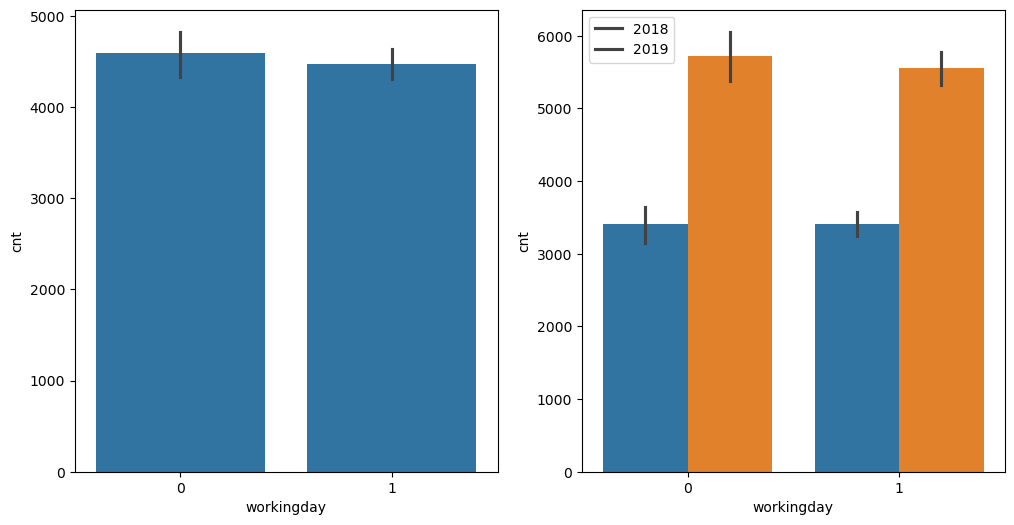

In [338]:
# visualising the column `workingday`

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='workingday', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='workingday', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- Bookings seem to be almost equal whether it is a working day or not.
-  But, surely, bookings has been increased from 2018 to 2019.

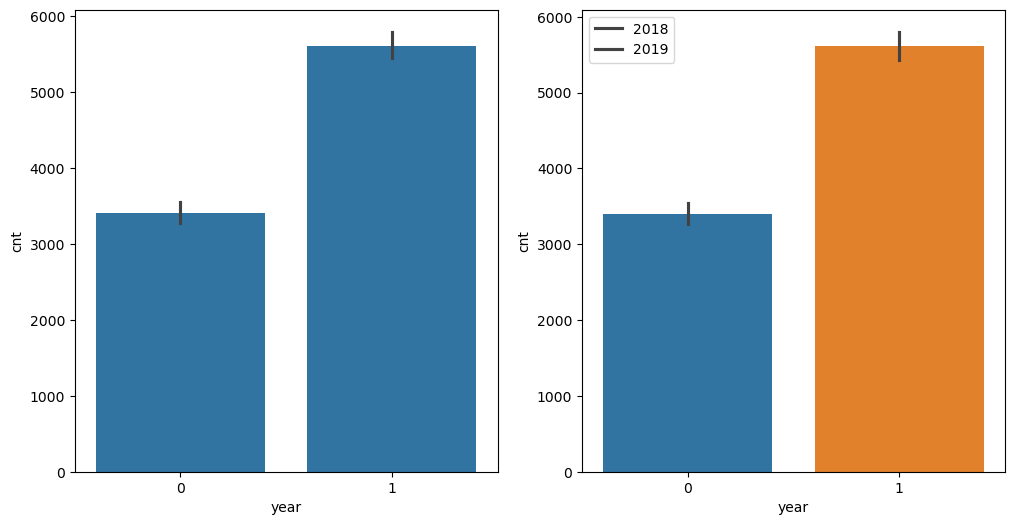

In [339]:
# visualising the column `year`

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='year', y='cnt', data=bike)

plt.subplot(1,2,2)
sns.barplot(x='year', y='cnt', data=bike, hue='year')
plt.legend(labels=['2018','2019'])
plt.show()

- Booking has increased in the year 2019, which is good for the business.

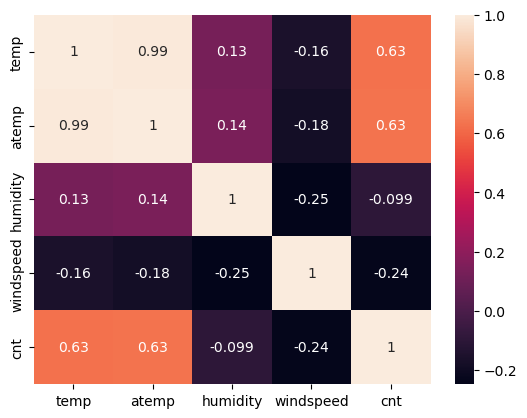

In [340]:
# Checking the correlation between the numerical variables

sns.heatmap(bike[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot=True)
plt.show()

### Step 3: Preparing the data for Modelling

In [341]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,january,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [342]:
# Creating the dummy variables for `season`, `month`, `weekday` and `weathersit`

season_dum = pd.get_dummies(bike.season, dtype=int, drop_first=True)
month_dum = pd.get_dummies(bike.month, dtype=int, drop_first=True)
weekday_dum = pd.get_dummies(bike.weekday, dtype=int, drop_first=True)
weathersit_dum = pd.get_dummies(bike.weathersit, dtype=int, drop_first=True)

In [343]:
# Concating the dummy dataframes to the original dataframe

bike = pd.concat([bike, season_dum, month_dum, weekday_dum, weathersit_dum], axis=1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Rain,Mist
0,spring,0,january,0,monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [344]:
# Dropping the unnecessay columns as we have already created the dummy variables out of it.

bike.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Rain,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
bike.shape

(730, 30)

In [346]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    int32  
 9   summer           730 non-null    int32  
 10  winter           730 non-null    int32  
 11  august           730 non-null    int32  
 12  december         730 non-null    int32  
 13  february         730 non-null    int32  
 14  january          730 non-null    int32  
 15  july             730 non-null    int32  
 16  june             730 non-null    int32  
 17  march           

#### Splitting the Data into Training and Testing Sets

In [347]:
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


#### Rescaling the Features

In [348]:
# Using MinMax Scaler
# Instantiate an object
scaler = MinMaxScaler()

# Create a list of numerical variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

# Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [349]:
# Check the head after scaling

bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Rain,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [350]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 4: Training and Building a Linear Model

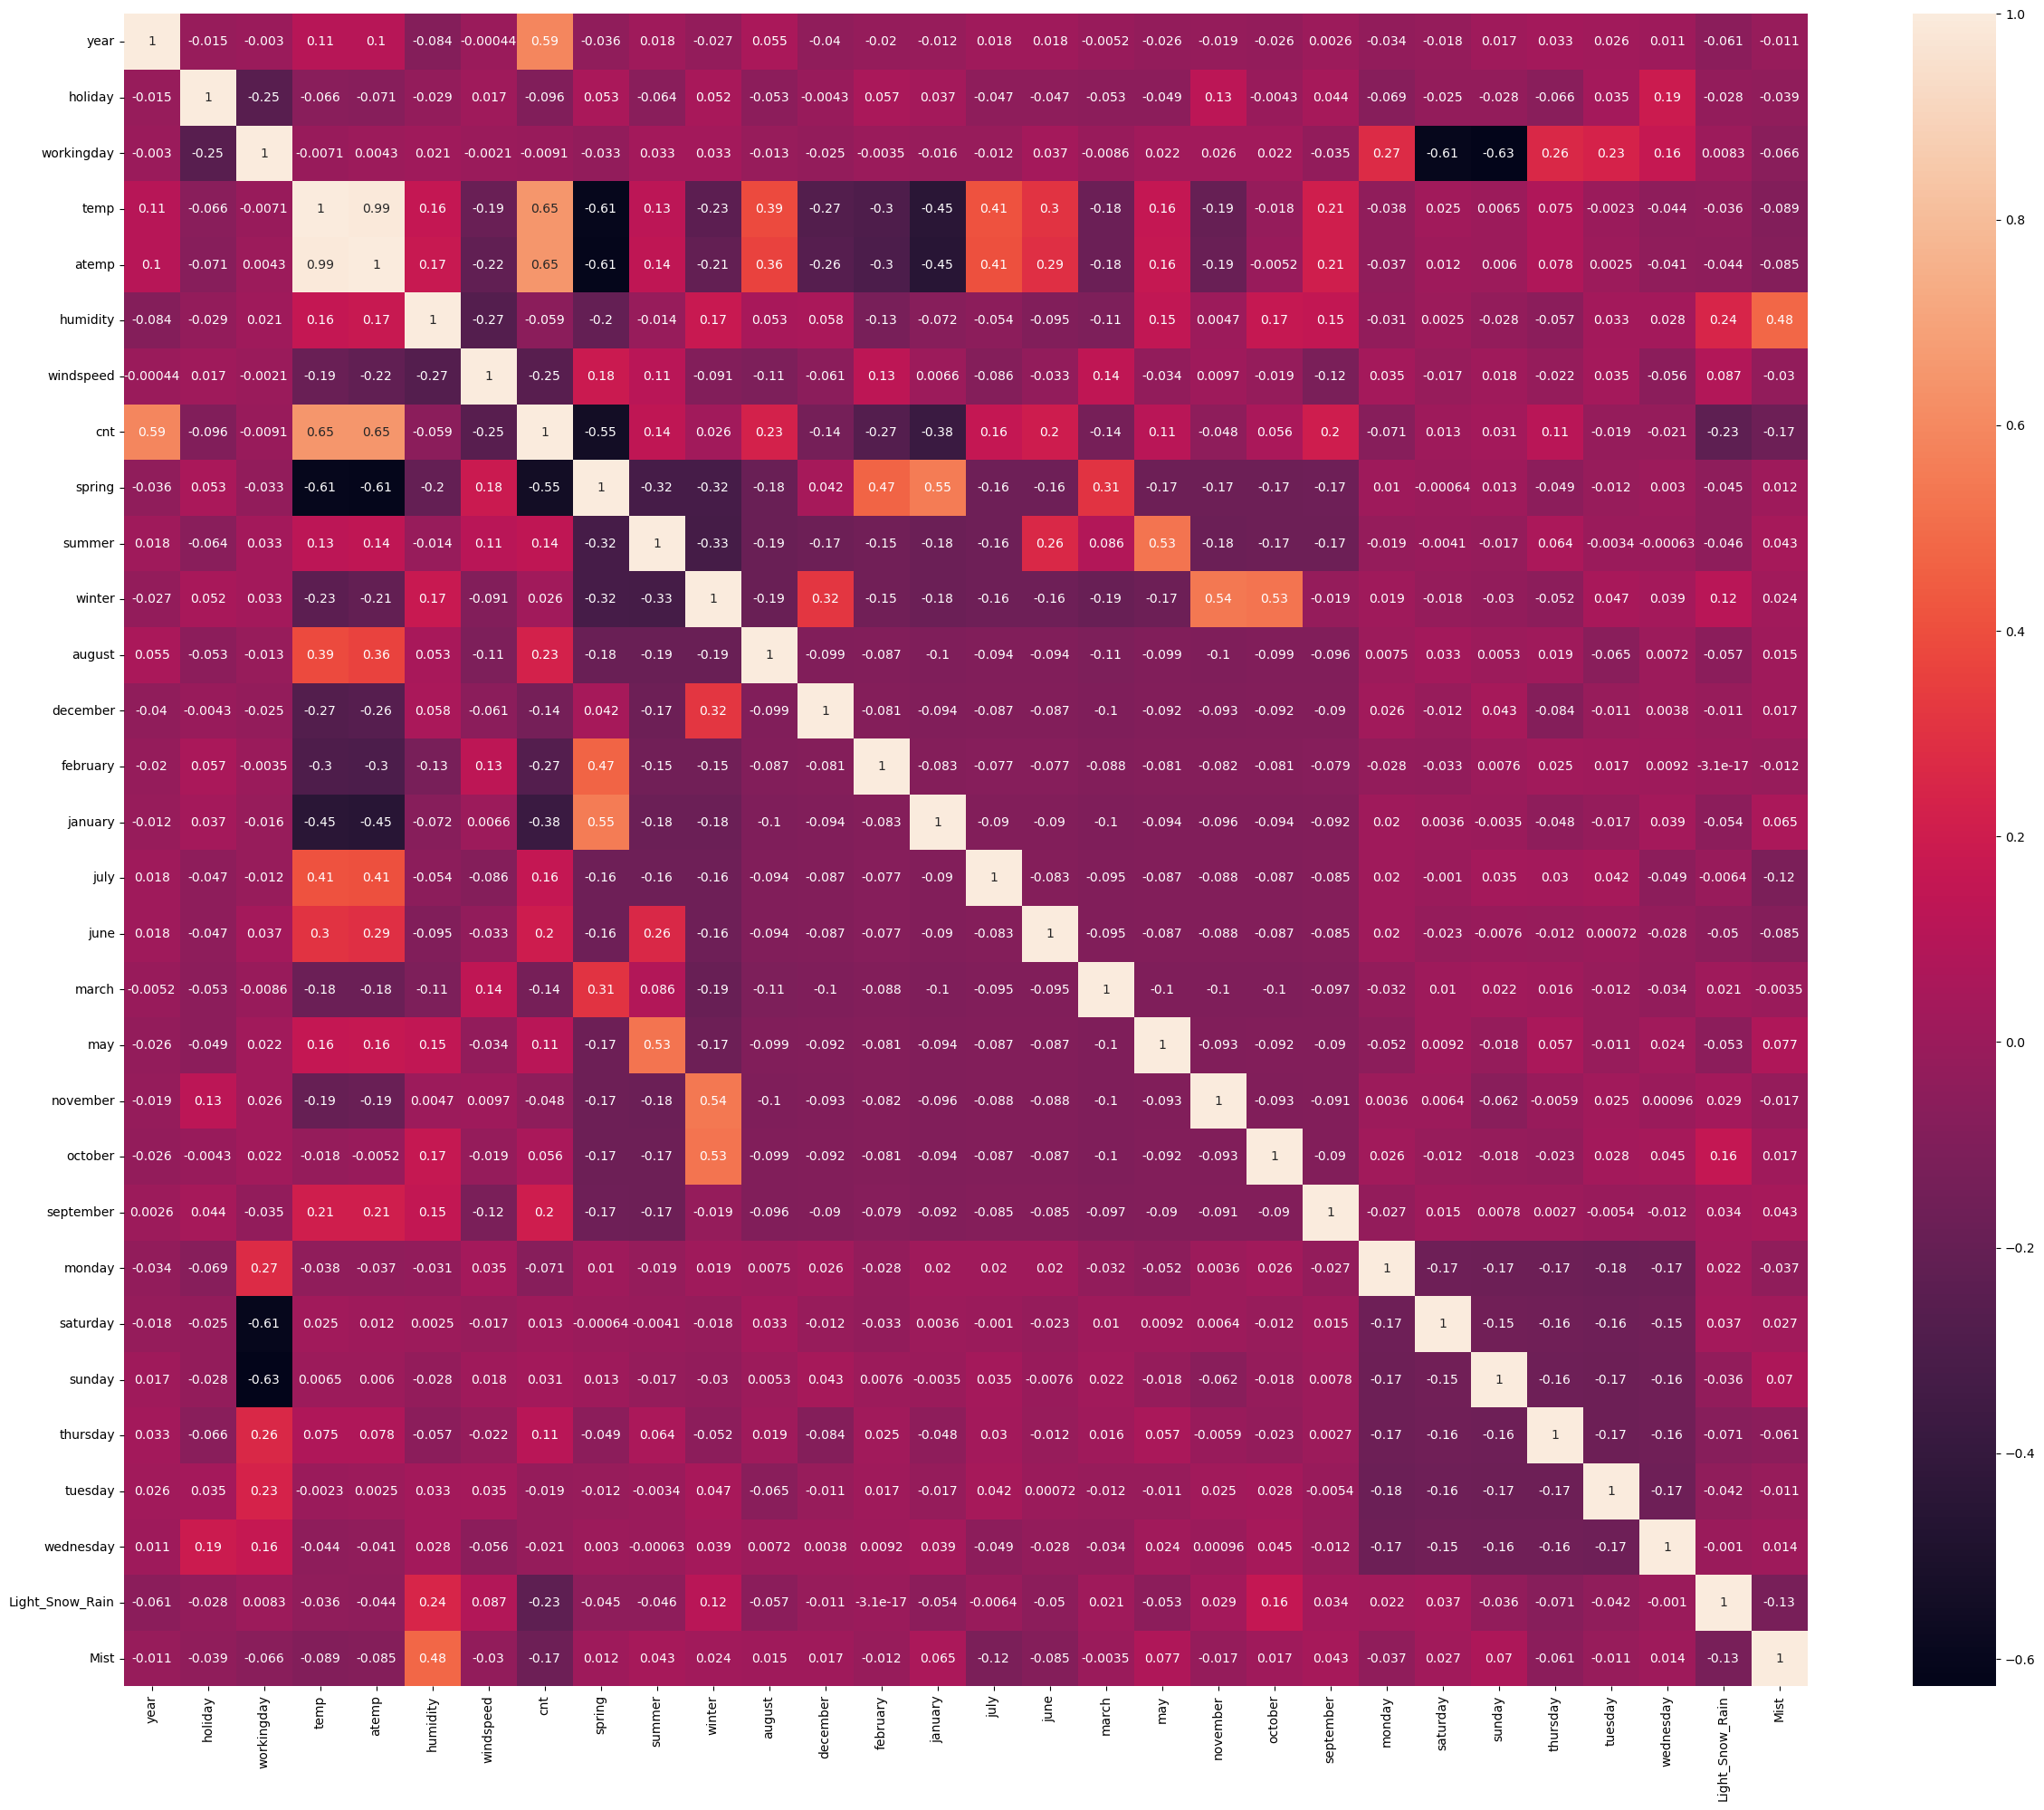

In [351]:
plt.figure(figsize=(30,24))
sns.heatmap(bike_train.corr(), annot=True)
plt.show()

- cnt seems to have correlation with `temp`, `atemp` and `year`.
- `spring` season with `january` and `february` month, `summer` season with `may` month and `winter` season with `october` and `november` month show good correlation.

In [352]:
# Building the Linear Model

X_train = bike_train
y_train = bike_train.pop('cnt')

In [353]:
# Building the model by adding all the variables
# Add a constant

X_train_sm = sm.add_constant(X_train)

# Create a model
lr = sm.OLS(y_train, X_train_sm)

# Fit the model
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.24e-177
Time:                        15:45:58   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3915      0.085      4.593      0.000       0.224       0.559
year                0.2312      0.008     28.360      0.000       0.215       0.247
holiday            -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday         -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                0.3873      0.143      2.699      0.007       0.105       0.669
atemp               0.0547      0.139      0.392      0.695      -0.219       0.329
humidity           -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed          -0.1802      0.027     -6.751      0.000      -0.233      -0.128
spring             -0.0409      0.030     -1.349      0.178      -0.100       0.019
summer              0.0458      0.026      1.733      0.084      -0.006       0.098
winter              0.1121      0.028      3.969      0.000       0.057       0.168
august              0.0291      0.034      0.849      0.396      -0.038       0.096
december           -0.0444      0.034     -1.308      0.191      -0.111       0.022
february           -0.0373      0.033     -1.119      0.264      -0.103       0.028
january            -0.0640      0.034     -1.887      0.060      -0.131       0.003
july               -0.0274      0.035     -0.773      0.440      -0.097       0.042
june                0.0097      0.025      0.384      0.701      -0.040       0.059
march               0.0010      0.025      0.041      0.967      -0.048       0.050
may                 0.0256      0.021      1.196      0.232      -0.016       0.068
november           -0.0395      0.037     -1.076      0.282      -0.112       0.033
october             0.0058      0.036      0.159      0.874      -0.065       0.077
september           0.0916      0.032      2.837      0.005       0.028       0.155
monday             -0.0247      0.015     -1.688      0.092      -0.053       0.004
saturday           -0.0557      0.072     -0.777      0.438      -0.197       0.085
sunday             -0.0499      0.072     -0.696      0.487      -0.191       0.091
thursday            0.0042      0.015      0.280      0.780      -0.025       0.034
tuesday            -0.0261      0.015     -1.776      0.076      -0.055       0.003
wednesday          -0.0103      0.015     -0.670      0.503      -0.040       0.020
Light_Snow_Rain    -0.2492      0.027     -9.324      0.000      -0.302      -0.197
Mist               -0.0578      0.011     -5.486      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59

In [354]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,441.52
4,atemp,382.19
2,workingday,63.90
5,humidity,41.23
7,spring,13.52
9,winter,12.43
23,sunday,12.35
22,saturday,11.84
8,summer,9.88
18,november,7.16


We will improve the model from here by dropping the variables, one at a time, according to p-values and VIF value.

There are other ways of building an improved model too like RFE. However, we are choosing to proceed with the top-down approach for this time.

In [355]:
# We are dropping `march` as it has high p-value

X = X_train.drop('march', axis=1)


# Building the 2nd Model

X_train_sm_2 = sm.add_constant(X)
lr_model_2 = sm.OLS(y_train, X_train_sm_2).fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.53
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.24e-178
Time:                        15:47:04   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     481   BIC:                            -865.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3921      0.084      4.684      0.000       0.228       0.557
year                0.2312      0.008     28.389      0.000       0.215       0.247
holiday            -0.1345      0.065     -2.056      0.040      -0.263      -0.006
workingday         -0.0605      0.071     -0.850      0.396      -0.200       0.079
temp                0.3871      0.143      2.702      0.007       0.106       0.669
atemp               0.0545      0.139      0.392      0.695      -0.219       0.328
humidity           -0.1577      0.039     -4.064      0.000      -0.234      -0.081
windspeed          -0.1803      0.027     -6.769      0.000      -0.233      -0.128
spring             -0.0405      0.029     -1.413      0.158      -0.097       0.016
summer              0.0456      0.026      1.759      0.079      -0.005       0.097
winter              0.1123      0.028      4.052      0.000       0.058       0.167
august              0.0286      0.032      0.886      0.376      -0.035       0.092
december           -0.0453      0.026     -1.725      0.085      -0.097       0.006
february           -0.0383      0.023     -1.702      0.089      -0.083       0.006
january            -0.0651      0.023     -2.882      0.004      -0.109      -0.021
july               -0.0278      0.034     -0.824      0.410      -0.094       0.038
june                0.0094      0.024      0.392      0.695      -0.038       0.056
may                 0.0252      0.020      1.264      0.207      -0.014       0.064
november           -0.0404      0.031     -1.297      0.195      -0.101       0.021
october             0.0050      0.031      0.161      0.872      -0.056       0.066
september           0.0910      0.029      3.106      0.002       0.033       0.149
monday             -0.0247      0.015     -1.694      0.091      -0.053       0.004
saturday           -0.0557      0.072     -0.777      0.437      -0.197       0.085
sunday             -0.0499      0.072     -0.696      0.487      -0.191       0.091
thursday            0.0042      0.015      0.281      0.779      -0.025       0.034
tuesday            -0.0261      0.015     -1.780      0.076      -0.055       0.003
wednesday          -0.0103      0.015     -0.672      0.502      -0.040       0.020
Light_Snow_Rain    -0.2492      0.027     -9.334      0.000      -0.302      -0.197
Mist               -0.0578      0.011     -5.493      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.698   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.896
Skew:                          -0.767   Prob(JB):                     7.18e-46
Kurtosis:                       5.726   Cond. No.                         92.3


In [356]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,441.43
4,atemp,381.94
2,workingday,57.65
5,humidity,40.61
9,winter,11.87
7,spring,11.57
22,sunday,11.11
21,saturday,10.73
8,summer,9.68
10,august,6.26


In [357]:
# Dropping variable `october` as it has high VIF value

X = X.drop('october', axis=1)


# Building the 3rd Model

X_train_sm_3 = sm.add_constant(X)
lr_model_3 = sm.OLS(y_train, X_train_sm_3).fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.24e-179
Time:                        15:48:30   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     482   BIC:                            -871.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3936      0.083      4.736      0.000       0.230       0.557
year                0.2312      0.008     28.442      0.000       0.215       0.247
holiday            -0.1345      0.065     -2.057      0.040      -0.263      -0.006
workingday         -0.0608      0.071     -0.855      0.393      -0.200       0.079
temp                0.3875      0.143      2.708      0.007       0.106       0.669
atemp               0.0546      0.139      0.393      0.695      -0.219       0.328
humidity           -0.1571      0.039     -4.072      0.000      -0.233      -0.081
windspeed          -0.1801      0.027     -6.774      0.000      -0.232      -0.128
spring             -0.0414      0.028     -1.478      0.140      -0.096       0.014
summer              0.0440      0.024      1.839      0.067      -0.003       0.091
winter              0.1144      0.024      4.672      0.000       0.066       0.163
august              0.0266      0.030      0.894      0.372      -0.032       0.085
december           -0.0483      0.019     -2.594      0.010      -0.085      -0.012
february           -0.0391      0.022     -1.785      0.075      -0.082       0.004
january            -0.0658      0.022     -2.990      0.003      -0.109      -0.023
july               -0.0298      0.031     -0.952      0.341      -0.091       0.032
june                0.0084      0.023      0.364      0.716      -0.037       0.054
may                 0.0249      0.020      1.255      0.210      -0.014       0.064
november           -0.0443      0.019     -2.294      0.022      -0.082      -0.006
september           0.0886      0.025      3.542      0.000       0.039       0.138
monday             -0.0246      0.015     -1.689      0.092      -0.053       0.004
saturday           -0.0559      0.072     -0.781      0.435      -0.197       0.085
sunday             -0.0501      0.072     -0.701      0.484      -0.191       0.090
thursday            0.0042      0.015      0.282      0.778      -0.025       0.034
tuesday            -0.0261      0.015     -1.781      0.075      -0.055       0.003
wednesday          -0.0102      0.015     -0.669      0.504      -0.040       0.020
Light_Snow_Rain    -0.2491      0.027     -9.342      0.000      -0.302      -0.197
Mist               -0.0579      0.011     -5.505      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.141   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.276
Skew:                          -0.764   Prob(JB):                     2.66e-45
Kurtosis:                       5.707   Cond. No.                         92.2
==============================================================================

Note

In [358]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,441.10
4,atemp,381.93
2,workingday,56.51
5,humidity,39.98
7,spring,11.19
21,sunday,10.87
20,saturday,10.48
9,winter,9.00
8,summer,8.38
6,windspeed,5.85


In [359]:
# Dropping `thursday` as it has high p-value

X = X.drop('thursday', axis=1)


# Building 4th Model

X_train_sm_4 = sm.add_constant(X)
lr_model_4 = sm.OLS(y_train, X_train_sm_4).fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.24e-180
Time:                        15:49:24   Log-Likelihood:                 523.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     483   BIC:                            -877.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3957      0.083      4.785      0.000       0.233       0.558
year                0.2312      0.008     28.487      0.000       0.215       0.247
holiday            -0.1345      0.065     -2.059      0.040      -0.263      -0.006
workingday         -0.0606      0.071     -0.853      0.394      -0.200       0.079
temp                0.3875      0.143      2.710      0.007       0.107       0.668
atemp               0.0548      0.139      0.394      0.694      -0.218       0.328
humidity           -0.1575      0.039     -4.087      0.000      -0.233      -0.082
windspeed          -0.1803      0.027     -6.786      0.000      -0.232      -0.128
spring             -0.0416      0.028     -1.485      0.138      -0.097       0.013
summer              0.0442      0.024      1.848      0.065      -0.003       0.091
winter              0.1145      0.024      4.683      0.000       0.066       0.163
august              0.0266      0.030      0.894      0.372      -0.032       0.085
december           -0.0486      0.019     -2.617      0.009      -0.085      -0.012
february           -0.0389      0.022     -1.778      0.076      -0.082       0.004
january            -0.0658      0.022     -2.992      0.003      -0.109      -0.023
july               -0.0296      0.031     -0.947      0.344      -0.091       0.032
june                0.0081      0.023      0.350      0.727      -0.037       0.054
may                 0.0249      0.020      1.255      0.210      -0.014       0.064
november           -0.0445      0.019     -2.307      0.021      -0.082      -0.007
september           0.0885      0.025      3.544      0.000       0.039       0.138
monday             -0.0266      0.013     -2.121      0.034      -0.051      -0.002
saturday           -0.0578      0.071     -0.812      0.417      -0.198       0.082
sunday             -0.0520      0.071     -0.731      0.465      -0.192       0.088
tuesday            -0.0282      0.013     -2.235      0.026      -0.053      -0.003
wednesday          -0.0123      0.013     -0.919      0.359      -0.039       0.014
Light_Snow_Rain    -0.2498      0.027     -9.418      0.000      -0.302      -0.198
Mist               -0.0579      0.010     -5.520      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.453   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.587
Skew:                          -0.766   Prob(JB):                     1.38e-45
Kurtosis:                       5.716   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [360]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,441.07
4,atemp,381.93
2,workingday,54.72
5,humidity,39.97
7,spring,11.19
21,sunday,10.86
20,saturday,10.47
9,winter,8.99
8,summer,8.35
6,windspeed,5.85


In [361]:
# Dropping `june` as it has high p-value

X = X.drop('june', axis=1)


# Building 5th Model

X_train_sm_5 = sm.add_constant(X)
lr_model_5 = sm.OLS(y_train, X_train_sm_5).fit()
lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.25e-181
Time:                        15:50:05   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     484   BIC:                            -883.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3953      0.083      4.785      0.000       0.233       0.558
year                0.2310      0.008     28.595      0.000       0.215       0.247
holiday            -0.1344      0.065     -2.059      0.040      -0.263      -0.006
workingday         -0.0596      0.071     -0.841      0.401      -0.199       0.080
temp                0.4025      0.136      2.954      0.003       0.135       0.670
atemp               0.0481      0.138      0.350      0.727      -0.222       0.318
humidity           -0.1593      0.038     -4.173      0.000      -0.234      -0.084
windspeed          -0.1815      0.026     -6.903      0.000      -0.233      -0.130
spring             -0.0442      0.027     -1.638      0.102      -0.097       0.009
summer              0.0429      0.024      1.817      0.070      -0.003       0.089
winter              0.1117      0.023      4.852      0.000       0.066       0.157
august              0.0204      0.024      0.854      0.394      -0.027       0.067
december           -0.0477      0.018     -2.596      0.010      -0.084      -0.012
february           -0.0378      0.022     -1.747      0.081      -0.080       0.005
january            -0.0642      0.021     -2.990      0.003      -0.106      -0.022
july               -0.0363      0.025     -1.458      0.146      -0.085       0.013
may                 0.0216      0.017      1.236      0.217      -0.013       0.056
november           -0.0439      0.019     -2.289      0.023      -0.082      -0.006
september           0.0841      0.022      3.891      0.000       0.042       0.127
monday             -0.0263      0.013     -2.105      0.036      -0.051      -0.002
saturday           -0.0569      0.071     -0.800      0.424      -0.197       0.083
sunday             -0.0510      0.071     -0.718      0.473      -0.190       0.089
tuesday            -0.0281      0.013     -2.228      0.026      -0.053      -0.003
wednesday          -0.0122      0.013     -0.910      0.363      -0.038       0.014
Light_Snow_Rain    -0.2498      0.027     -9.425      0.000      -0.302      -0.198
Mist               -0.0577      0.010     -5.514      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.822   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.187
Skew:                          -0.765   Prob(JB):                     1.25e-44
Kurtosis:                       5.679   Cond. No.                         89.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,401.28
4,atemp,374.74
2,workingday,54.55
5,humidity,39.20
20,sunday,10.82
19,saturday,10.45
7,spring,10.30
8,summer,8.11
9,winter,7.89
6,windspeed,5.74


In [363]:
# Dropping `atemp` as it has high p-value

X = X.drop('atemp', axis=1)


# Building 6th Model

X_train_sm_6 = sm.add_constant(X)
lr_model_6 = sm.OLS(y_train, X_train_sm_6).fit()
lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.22e-182
Time:                        15:50:48   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3950      0.083      4.786      0.000       0.233       0.557
year                0.2309      0.008     28.619      0.000       0.215       0.247
holiday            -0.1346      0.065     -2.064      0.040      -0.263      -0.006
workingday         -0.0593      0.071     -0.838      0.402      -0.198       0.080
temp                0.4482      0.039     11.556      0.000       0.372       0.524
humidity           -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed          -0.1833      0.026     -7.121      0.000      -0.234      -0.133
spring             -0.0434      0.027     -1.618      0.106      -0.096       0.009
summer              0.0436      0.023      1.859      0.064      -0.002       0.090
winter              0.1125      0.023      4.917      0.000       0.068       0.157
august              0.0198      0.024      0.830      0.407      -0.027       0.067
december           -0.0476      0.018     -2.595      0.010      -0.084      -0.012
february           -0.0379      0.022     -1.752      0.080      -0.080       0.005
january            -0.0644      0.021     -3.003      0.003      -0.106      -0.022
july               -0.0363      0.025     -1.459      0.145      -0.085       0.013
may                 0.0214      0.017      1.225      0.221      -0.013       0.056
november           -0.0439      0.019     -2.288      0.023      -0.082      -0.006
september           0.0842      0.022      3.896      0.000       0.042       0.127
monday             -0.0263      0.013     -2.107      0.036      -0.051      -0.002
saturday           -0.0570      0.071     -0.803      0.422      -0.197       0.083
sunday             -0.0508      0.071     -0.716      0.474      -0.190       0.089
tuesday            -0.0281      0.013     -2.228      0.026      -0.053      -0.003
wednesday          -0.0122      0.013     -0.911      0.363      -0.038       0.014
Light_Snow_Rain    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
Mist               -0.0578      0.010     -5.526      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,workingday,54.55
4,humidity,39.11
3,temp,29.71
19,sunday,10.82
18,saturday,10.44
6,spring,10.24
7,summer,8.04
8,winter,7.81
5,windspeed,5.50
9,august,3.44


In [365]:
# Dropping `sunday` as it has high p-value

X = X.drop('sunday', axis=1)


# Building 7th Model

X_train_sm_7 = sm.add_constant(X)
lr_model_7 = sm.OLS(y_train, X_train_sm_7).fit()
lr_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.42e-183
Time:                        15:51:50   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     486   BIC:                            -895.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3436      0.041      8.442      0.000       0.264       0.424
year                0.2313      0.008     28.724      0.000       0.215       0.247
holiday            -0.0926      0.029     -3.247      0.001      -0.149      -0.037
workingday         -0.0095      0.013     -0.732      0.465      -0.035       0.016
temp                0.4490      0.039     11.588      0.000       0.373       0.525
humidity           -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed          -0.1838      0.026     -7.147      0.000      -0.234      -0.133
spring             -0.0431      0.027     -1.608      0.109      -0.096       0.010
summer              0.0437      0.023      1.863      0.063      -0.002       0.090
winter              0.1123      0.023      4.910      0.000       0.067       0.157
august              0.0194      0.024      0.816      0.415      -0.027       0.066
december           -0.0474      0.018     -2.584      0.010      -0.083      -0.011
february           -0.0375      0.022     -1.736      0.083      -0.080       0.005
january            -0.0641      0.021     -2.995      0.003      -0.106      -0.022
july               -0.0367      0.025     -1.476      0.141      -0.085       0.012
may                 0.0211      0.017      1.209      0.227      -0.013       0.055
november           -0.0451      0.019     -2.364      0.018      -0.083      -0.008
september           0.0843      0.022      3.904      0.000       0.042       0.127
monday             -0.0258      0.012     -2.069      0.039      -0.050      -0.001
saturday           -0.0074      0.015     -0.483      0.629      -0.037       0.023
tuesday            -0.0273      0.013     -2.174      0.030      -0.052      -0.003
wednesday          -0.0109      0.013     -0.824      0.411      -0.037       0.015
Light_Snow_Rain    -0.2503      0.026     -9.480      0.000      -0.302      -0.198
Mist               -0.0578      0.010     -5.529      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.267   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.188
Skew:                          -0.765   Prob(JB):                     1.52e-43
Kurtosis:                       5.634   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [366]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,humidity,34.32
3,temp,21.83
2,workingday,7.46
6,spring,7.37
8,winter,5.99
7,summer,5.87
5,windspeed,4.96
9,august,3.14
13,july,2.79
12,january,2.42


In [367]:
# Dropping `saturday` as it has high p-value

X = X.drop('saturday', axis=1)


# Building 8th Model

X_train_sm_8 = sm.add_constant(X)
lr_model_8 = sm.OLS(y_train, X_train_sm_8).fit()
lr_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.41e-184
Time:                        15:52:25   Log-Likelihood:                 522.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     487   BIC:                            -901.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3403      0.040      8.486      0.000       0.262       0.419
year                0.2314      0.008     28.774      0.000       0.216       0.247
holiday            -0.0895      0.028     -3.223      0.001      -0.144      -0.035
workingday         -0.0059      0.011     -0.556      0.579      -0.027       0.015
temp                0.4486      0.039     11.590      0.000       0.373       0.525
humidity           -0.1575      0.038     -4.144      0.000      -0.232      -0.083
windspeed          -0.1835      0.026     -7.143      0.000      -0.234      -0.133
spring             -0.0436      0.027     -1.626      0.105      -0.096       0.009
summer              0.0434      0.023      1.852      0.065      -0.003       0.089
winter              0.1120      0.023      4.905      0.000       0.067       0.157
august              0.0191      0.024      0.803      0.422      -0.028       0.066
december           -0.0472      0.018     -2.578      0.010      -0.083      -0.011
february           -0.0372      0.022     -1.726      0.085      -0.080       0.005
january            -0.0641      0.021     -2.998      0.003      -0.106      -0.022
july               -0.0367      0.025     -1.477      0.140      -0.085       0.012
may                 0.0210      0.017      1.205      0.229      -0.013       0.055
november           -0.0456      0.019     -2.397      0.017      -0.083      -0.008
september           0.0841      0.022      3.899      0.000       0.042       0.126
monday             -0.0258      0.012     -2.069      0.039      -0.050      -0.001
tuesday            -0.0273      0.013     -2.174      0.030      -0.052      -0.003
wednesday          -0.0108      0.013     -0.819      0.413      -0.037       0.015
Light_Snow_Rain    -0.2508      0.026     -9.516      0.000      -0.303      -0.199
Mist               -0.0577      0.010     -5.524      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.140   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.055
Skew:                          -0.755   Prob(JB):                     7.27e-43
Kurtosis:                       5.618   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,humidity,34.11
3,temp,21.39
6,spring,7.17
8,winter,5.89
7,summer,5.74
2,workingday,5.15
5,windspeed,4.95
9,august,3.12
13,july,2.78
12,january,2.41


In [369]:
# Dropping `workingday` as it has high p-value

X = X.drop('workingday', axis=1)


# Building 9th Model

X_train_sm_9 = sm.add_constant(X)
lr_model_9 = sm.OLS(y_train, X_train_sm_9).fit()
lr_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.41e-185
Time:                        15:53:13   Log-Likelihood:                 522.33
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3374      0.040      8.492      0.000       0.259       0.415
year                0.2314      0.008     28.798      0.000       0.216       0.247
holiday            -0.0841      0.026     -3.237      0.001      -0.135      -0.033
temp                0.4486      0.039     11.597      0.000       0.373       0.525
humidity           -0.1585      0.038     -4.180      0.000      -0.233      -0.084
windspeed          -0.1835      0.026     -7.148      0.000      -0.234      -0.133
spring             -0.0432      0.027     -1.615      0.107      -0.096       0.009
summer              0.0436      0.023      1.861      0.063      -0.002       0.090
winter              0.1124      0.023      4.927      0.000       0.068       0.157
august              0.0195      0.024      0.821      0.412      -0.027       0.066
december           -0.0470      0.018     -2.569      0.011      -0.083      -0.011
february           -0.0375      0.022     -1.742      0.082      -0.080       0.005
january            -0.0642      0.021     -3.001      0.003      -0.106      -0.022
july               -0.0360      0.025     -1.453      0.147      -0.085       0.013
may                 0.0209      0.017      1.202      0.230      -0.013       0.055
november           -0.0462      0.019     -2.433      0.015      -0.084      -0.009
september           0.0844      0.022      3.916      0.000       0.042       0.127
monday             -0.0286      0.011     -2.513      0.012      -0.051      -0.006
tuesday            -0.0300      0.012     -2.609      0.009      -0.053      -0.007
wednesday          -0.0136      0.012     -1.107      0.269      -0.038       0.010
Light_Snow_Rain    -0.2505      0.026     -9.513      0.000      -0.302      -0.199
Mist               -0.0571      0.010     -5.500      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       74.723   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.138
Skew:                          -0.739   Prob(JB):                     1.90e-42
Kurtosis:                       5.619   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [370]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,33.65
2,temp,21.17
5,spring,7.14
7,winter,5.88
6,summer,5.70
4,windspeed,4.94
8,august,3.12
12,july,2.78
11,january,2.41
20,Mist,2.34


In [371]:
# Dropping `august` as it has high p-value

X = X.drop('august', axis=1)


# Building 10th Model

X_train_sm_10 = sm.add_constant(X)
lr_model_10 = sm.OLS(y_train, X_train_sm_10).fit()
lr_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.66e-186
Time:                        15:54:02   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3483      0.037      9.299      0.000       0.275       0.422
year                0.2316      0.008     28.843      0.000       0.216       0.247
holiday            -0.0847      0.026     -3.260      0.001      -0.136      -0.034
temp                0.4510      0.039     11.695      0.000       0.375       0.527
humidity           -0.1572      0.038     -4.149      0.000      -0.232      -0.083
windspeed          -0.1837      0.026     -7.157      0.000      -0.234      -0.133
spring             -0.0557      0.022     -2.523      0.012      -0.099      -0.012
summer              0.0304      0.017      1.784      0.075      -0.003       0.064
winter              0.1009      0.018      5.614      0.000       0.066       0.136
december           -0.0480      0.018     -2.627      0.009      -0.084      -0.012
february           -0.0375      0.022     -1.742      0.082      -0.080       0.005
january            -0.0642      0.021     -3.001      0.003      -0.106      -0.022
july               -0.0499      0.018     -2.751      0.006      -0.085      -0.014
may                 0.0205      0.017      1.177      0.240      -0.014       0.055
november           -0.0475      0.019     -2.506      0.013      -0.085      -0.010
september           0.0733      0.017      4.371      0.000       0.040       0.106
monday             -0.0283      0.011     -2.489      0.013      -0.051      -0.006
tuesday            -0.0302      0.012     -2.624      0.009      -0.053      -0.008
wednesday          -0.0133      0.012     -1.090      0.276      -0.037       0.011
Light_Snow_Rain    -0.2516      0.026     -9.568      0.000      -0.303      -0.200
Mist               -0.0568      0.010     -5.474      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       75.856   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.791
Skew:                          -0.750   Prob(JB):                     5.03e-43
Kurtosis:                       5.630   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,32.04
2,temp,18.41
5,spring,5.45
4,windspeed,4.87
7,winter,4.10
6,summer,3.35
10,january,2.38
19,Mist,2.34
0,year,2.11
9,february,1.92


In [373]:
# Dropping `wednesday` as it has high p-value

X = X.drop('wednesday', axis=1)


# Building 11th Model

X_train_sm_11 = sm.add_constant(X)
lr_model_11 = sm.OLS(y_train, X_train_sm_11).fit()
lr_model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.45e-187
Time:                        15:55:27   Log-Likelihood:                 521.36
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3449      0.037      9.238      0.000       0.272       0.418
year                0.2314      0.008     28.820      0.000       0.216       0.247
holiday            -0.0902      0.025     -3.540      0.000      -0.140      -0.040
temp                0.4530      0.039     11.758      0.000       0.377       0.529
humidity           -0.1584      0.038     -4.183      0.000      -0.233      -0.084
windspeed          -0.1827      0.026     -7.120      0.000      -0.233      -0.132
spring             -0.0548      0.022     -2.484      0.013      -0.098      -0.011
summer              0.0307      0.017      1.800      0.072      -0.003       0.064
winter              0.1004      0.018      5.589      0.000       0.065       0.136
december           -0.0472      0.018     -2.588      0.010      -0.083      -0.011
february           -0.0377      0.022     -1.749      0.081      -0.080       0.005
january            -0.0646      0.021     -3.021      0.003      -0.107      -0.023
july               -0.0497      0.018     -2.741      0.006      -0.085      -0.014
may                 0.0201      0.017      1.153      0.249      -0.014       0.054
november           -0.0461      0.019     -2.442      0.015      -0.083      -0.009
september           0.0739      0.017      4.412      0.000       0.041       0.107
monday             -0.0258      0.011     -2.318      0.021      -0.048      -0.004
tuesday            -0.0275      0.011     -2.446      0.015      -0.050      -0.005
Light_Snow_Rain    -0.2511      0.026     -9.552      0.000      -0.303      -0.199
Mist               -0.0566      0.010     -5.454      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       74.663   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.519
Skew:                          -0.732   Prob(JB):                     3.50e-43
Kurtosis:                       5.657   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,31.84
2,temp,18.41
5,spring,5.45
4,windspeed,4.87
7,winter,4.08
6,summer,3.35
10,january,2.38
18,Mist,2.34
0,year,2.11
9,february,1.92


In [375]:
# Dropping `may` as it has high p-value

X = X.drop('may', axis=1)


# Building 12th Model

X_train_sm_12 = sm.add_constant(X)
lr_model_12 = sm.OLS(y_train, X_train_sm_12).fit()
lr_model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.77e-188
Time:                        15:56:06   Log-Likelihood:                 520.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     491   BIC:                            -922.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3360      0.037      9.195      0.000       0.264       0.408
year                0.2309      0.008     28.790      0.000       0.215       0.247
holiday            -0.0909      0.025     -3.570      0.000      -0.141      -0.041
temp                0.4607      0.038     12.142      0.000       0.386       0.535
humidity           -0.1529      0.038     -4.068      0.000      -0.227      -0.079
windspeed          -0.1841      0.026     -7.182      0.000      -0.234      -0.134
spring             -0.0515      0.022     -2.353      0.019      -0.094      -0.008
summer              0.0393      0.015      2.562      0.011       0.009       0.069
winter              0.1022      0.018      5.711      0.000       0.067       0.137
december           -0.0461      0.018     -2.527      0.012      -0.082      -0.010
february           -0.0365      0.022     -1.694      0.091      -0.079       0.006
january            -0.0631      0.021     -2.957      0.003      -0.105      -0.021
july               -0.0500      0.018     -2.760      0.006      -0.086      -0.014
november           -0.0447      0.019     -2.369      0.018      -0.082      -0.008
september           0.0739      0.017      4.410      0.000       0.041       0.107
monday             -0.0264      0.011     -2.367      0.018      -0.048      -0.004
tuesday            -0.0278      0.011     -2.477      0.014      -0.050      -0.006
Light_Snow_Rain    -0.2528      0.026     -9.626      0.000      -0.304      -0.201
Mist               -0.0568      0.010     -5.471      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.404   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.627
Skew:                          -0.735   Prob(JB):                     1.34e-40
Kurtosis:                       5.546   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,31.80
2,temp,18.36
5,spring,5.45
4,windspeed,4.78
7,winter,4.08
6,summer,2.82
10,january,2.38
17,Mist,2.34
0,year,2.10
9,february,1.92


In [377]:
# Dropping `february` as it has high p-value

X = X.drop('february', axis=1)


# Building 13th Model

X_train_sm_13 = sm.add_constant(X)
lr_model_13 = sm.OLS(y_train, X_train_sm_13).fit()
lr_model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.21e-188
Time:                        15:57:03   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     492   BIC:                            -926.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3239      0.036      9.021      0.000       0.253       0.394
year                0.2305      0.008     28.700      0.000       0.215       0.246
holiday            -0.0933      0.025     -3.662      0.000      -0.143      -0.043
temp                0.4771      0.037     12.975      0.000       0.405       0.549
humidity           -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed          -0.1829      0.026     -7.124      0.000      -0.233      -0.132
spring             -0.0615      0.021     -2.912      0.004      -0.103      -0.020
summer              0.0427      0.015      2.803      0.005       0.013       0.073
winter              0.1040      0.018      5.810      0.000       0.069       0.139
december           -0.0366      0.017     -2.107      0.036      -0.071      -0.002
january            -0.0436      0.018     -2.421      0.016      -0.079      -0.008
july               -0.0510      0.018     -2.812      0.005      -0.087      -0.015
november           -0.0397      0.019     -2.128      0.034      -0.076      -0.003
september           0.0755      0.017      4.502      0.000       0.043       0.108
monday             -0.0258      0.011     -2.309      0.021      -0.048      -0.004
tuesday            -0.0280      0.011     -2.487      0.013      -0.050      -0.006
Light_Snow_Rain    -0.2514      0.026     -9.559      0.000      -0.303      -0.200
Mist               -0.0565      0.010     -5.432      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       68.562   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.059
Skew:                          -0.691   Prob(JB):                     1.18e-37
Kurtosis:                       5.468   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [378]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,31.17
2,temp,17.82
4,windspeed,4.77
5,spring,4.37
7,winter,4.08
6,summer,2.82
16,Mist,2.33
0,year,2.09
11,november,1.85
9,january,1.75


In [379]:
# Dropping `december` as it has high p-value

X = X.drop('december', axis=1)


# Building 14th Model

X_train_sm_14 = sm.add_constant(X)
lr_model_14 = sm.OLS(y_train, X_train_sm_14).fit()
lr_model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          8.24e-189
Time:                        15:57:37   Log-Likelihood:                 516.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     493   BIC:                            -927.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3071      0.035      8.742      0.000       0.238       0.376
year                0.2302      0.008     28.570      0.000       0.214       0.246
holiday            -0.0943      0.026     -3.690      0.000      -0.145      -0.044
temp                0.5019      0.035     14.360      0.000       0.433       0.571
humidity           -0.1629      0.038     -4.335      0.000      -0.237      -0.089
windspeed          -0.1800      0.026     -6.997      0.000      -0.231      -0.129
spring             -0.0562      0.021     -2.674      0.008      -0.098      -0.015
summer              0.0484      0.015      3.220      0.001       0.019       0.078
winter              0.0990      0.018      5.561      0.000       0.064       0.134
january            -0.0339      0.017     -1.941      0.053      -0.068       0.000
july               -0.0518      0.018     -2.846      0.005      -0.088      -0.016
november           -0.0241      0.017     -1.404      0.161      -0.058       0.010
september           0.0803      0.017      4.819      0.000       0.048       0.113
monday             -0.0258      0.011     -2.308      0.021      -0.048      -0.004
tuesday            -0.0272      0.011     -2.406      0.016      -0.049      -0.005
Light_Snow_Rain    -0.2450      0.026     -9.345      0.000      -0.296      -0.193
Mist               -0.0549      0.010     -5.273      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       61.550   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.599
Skew:                          -0.643   Prob(JB):                     6.58e-32
Kurtosis:                       5.259   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [380]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,29.34
2,temp,16.82
4,windspeed,4.76
5,spring,4.37
7,winter,3.79
6,summer,2.80
15,Mist,2.30
0,year,2.09
8,january,1.67
9,july,1.60


In [381]:
# Dropping `november` as it has high p-value

X = X.drop('november', axis=1)


# Building 15th Model

X_train_sm_15 = sm.add_constant(X)
lr_model_15 = sm.OLS(y_train, X_train_sm_15).fit()
lr_model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.60e-189
Time:                        15:58:17   Log-Likelihood:                 515.87
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     494   BIC:                            -932.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3000      0.035      8.621      0.000       0.232       0.368
year                0.2302      0.008     28.534      0.000       0.214       0.246
holiday            -0.0987      0.025     -3.885      0.000      -0.149      -0.049
temp                0.5090      0.035     14.702      0.000       0.441       0.577
humidity           -0.1612      0.038     -4.289      0.000      -0.235      -0.087
windspeed          -0.1816      0.026     -7.061      0.000      -0.232      -0.131
spring             -0.0519      0.021     -2.491      0.013      -0.093      -0.011
summer              0.0507      0.015      3.393      0.001       0.021       0.080
winter              0.0937      0.017      5.380      0.000       0.059       0.128
january            -0.0331      0.017     -1.896      0.059      -0.067       0.001
july               -0.0515      0.018     -2.827      0.005      -0.087      -0.016
september           0.0829      0.017      5.000      0.000       0.050       0.116
monday             -0.0257      0.011     -2.289      0.022      -0.048      -0.004
tuesday            -0.0271      0.011     -2.398      0.017      -0.049      -0.005
Light_Snow_Rain    -0.2438      0.026     -9.295      0.000      -0.295      -0.192
Mist               -0.0547      0.010     -5.250      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       59.772   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.949
Skew:                          -0.631   Prob(JB):                     1.83e-30
Kurtosis:                       5.202   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [382]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,29.26
2,temp,16.73
4,windspeed,4.70
5,spring,4.34
7,winter,3.37
6,summer,2.79
14,Mist,2.30
0,year,2.09
8,january,1.67
9,july,1.60


In [383]:
# Dropping `january` as it has high p-value

X = X.drop('january', axis=1)


# Building 16th Model

X_train_sm_16 = sm.add_constant(X)
lr_model_16 = sm.OLS(y_train, X_train_sm_16).fit()
lr_model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          6.73e-190
Time:                        15:59:22   Log-Likelihood:                 514.02
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     495   BIC:                            -934.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2885      0.034      8.398      0.000       0.221       0.356
year                0.2294      0.008     28.401      0.000       0.214       0.245
holiday            -0.0993      0.025     -3.901      0.000      -0.149      -0.049
temp                0.5263      0.033     15.721      0.000       0.461       0.592
humidity           -0.1658      0.038     -4.407      0.000      -0.240      -0.092
windspeed          -0.1765      0.026     -6.881      0.000      -0.227      -0.126
spring             -0.0563      0.021     -2.716      0.007      -0.097      -0.016
summer              0.0536      0.015      3.592      0.000       0.024       0.083
winter              0.0993      0.017      5.776      0.000       0.066       0.133
july               -0.0532      0.018     -2.912      0.004      -0.089      -0.017
september           0.0835      0.017      5.021      0.000       0.051       0.116
monday             -0.0259      0.011     -2.307      0.021      -0.048      -0.004
tuesday            -0.0269      0.011     -2.378      0.018      -0.049      -0.005
Light_Snow_Rain    -0.2414      0.026     -9.193      0.000      -0.293      -0.190
Mist               -0.0547      0.010     -5.241      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       58.372   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.778
Skew:                          -0.615   Prob(JB):                     5.41e-30
Kurtosis:                       5.198   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [384]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,humidity,28.28
2,temp,16.04
4,windspeed,4.70
5,spring,4.01
7,winter,3.34
6,summer,2.79
13,Mist,2.30
0,year,2.08
8,july,1.59
9,september,1.39


In [385]:
# Dropping `humidity` as it has high p-value

X = X.drop('humidity', axis=1)


# Building 17th Model

X_train_sm_17 = sm.add_constant(X)
lr_model_17 = sm.OLS(y_train, X_train_sm_17).fit()
lr_model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          6.15e-187
Time:                        16:00:06   Log-Likelihood:                 504.21
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     496   BIC:                            -921.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2068      0.029      7.020      0.000       0.149       0.265
year                0.2335      0.008     28.576      0.000       0.217       0.250
holiday            -0.0997      0.026     -3.845      0.000      -0.151      -0.049
temp                0.4891      0.033     14.824      0.000       0.424       0.554
windspeed          -0.1431      0.025     -5.735      0.000      -0.192      -0.094
spring             -0.0665      0.021     -3.167      0.002      -0.108      -0.025
summer              0.0475      0.015      3.138      0.002       0.018       0.077
winter              0.0845      0.017      4.920      0.000       0.051       0.118
july               -0.0477      0.019     -2.573      0.010      -0.084      -0.011
september           0.0774      0.017      4.590      0.000       0.044       0.111
monday             -0.0265      0.011     -2.320      0.021      -0.049      -0.004
tuesday            -0.0308      0.012     -2.680      0.008      -0.053      -0.008
Light_Snow_Rain    -0.2873      0.025    -11.696      0.000      -0.336      -0.239
Mist               -0.0812      0.009     -9.336      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       58.761   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.447
Skew:                          -0.627   Prob(JB):                     1.74e-29
Kurtosis:                       5.159   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.15
3,windspeed,4.63
5,summer,2.24
4,spring,2.12
0,year,2.07
6,winter,1.83
7,july,1.59
12,Mist,1.55
8,september,1.34
10,tuesday,1.24


In [387]:
# Dropping `monday` as it has high p-value

X = X.drop('monday', axis=1)


# Building 18th Model

X_train_sm_18 = sm.add_constant(X)
lr_model_18 = sm.OLS(y_train, X_train_sm_18).fit()
lr_model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.93e-187
Time:                        16:00:52   Log-Likelihood:                 501.46
No. Observations:                 510   AIC:                            -976.9
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2000      0.029      6.793      0.000       0.142       0.258
year                0.2340      0.008     28.517      0.000       0.218       0.250
holiday            -0.0956      0.026     -3.679      0.000      -0.147      -0.045
temp                0.4923      0.033     14.871      0.000       0.427       0.557
windspeed          -0.1455      0.025     -5.808      0.000      -0.195      -0.096
spring             -0.0654      0.021     -3.104      0.002      -0.107      -0.024
summer              0.0481      0.015      3.165      0.002       0.018       0.078
winter              0.0845      0.017      4.898      0.000       0.051       0.118
july               -0.0492      0.019     -2.645      0.008      -0.086      -0.013
september           0.0778      0.017      4.593      0.000       0.045       0.111
tuesday            -0.0259      0.011     -2.283      0.023      -0.048      -0.004
Light_Snow_Rain    -0.2871      0.025    -11.637      0.000      -0.336      -0.239
Mist               -0.0804      0.009     -9.208      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       60.354   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.223
Skew:                          -0.652   Prob(JB):                     1.94e-29
Kurtosis:                       5.126   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,4.61
5,summer,2.24
4,spring,2.09
0,year,2.07
6,winter,1.81
7,july,1.59
11,Mist,1.55
8,september,1.34
9,tuesday,1.20


In [389]:
# Dropping `tuesday` as it has high p-value

X = X.drop('tuesday', axis=1)


# Building 19th Model

X_train_sm_19 = sm.add_constant(X)
lr_model_19 = sm.OLS(y_train, X_train_sm_19).fit()
lr_model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          5.06e-187
Time:                        16:01:06   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030      6.746      0.000       0.141       0.258
year                0.2336      0.008     28.352      0.000       0.217       0.250
holiday            -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                0.4910      0.033     14.770      0.000       0.426       0.556
windspeed          -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring             -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer              0.0465      0.015      3.051      0.002       0.017       0.076
winter              0.0817      0.017      4.730      0.000       0.048       0.116
july               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
september           0.0768      0.017      4.517      0.000       0.043       0.110
Light_Snow_Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist               -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
10,Mist,1.55
8,september,1.34
9,Light_Snow_Rain,1.08


In [391]:
# Dropping `july` as it has high p-value

X = X.drop('july', axis=1)


# Building 20th Model

X_train_sm_20 = sm.add_constant(X)
lr_model_20 = sm.OLS(y_train, X_train_sm_20).fit()
lr_model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.47e-186
Time:                        16:01:32   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030      6.447      0.000       0.133       0.249
year                0.2341      0.008     28.237      0.000       0.218       0.250
holiday            -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                0.4777      0.033     14.423      0.000       0.413       0.543
windspeed          -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring             -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer              0.0621      0.014      4.350      0.000       0.034       0.090
winter              0.0945      0.017      5.630      0.000       0.062       0.127
september           0.0910      0.016      5.566      0.000       0.059       0.123
Light_Snow_Rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist               -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [392]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Mist,1.55
7,september,1.23
8,Light_Snow_Rain,1.08
1,holiday,1.04


As we can see, both VIF values and p-values is in accepted range. So we can go ahead and make the predictions using `lr_model_20`.

F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e., almost equal to zero states that the overall model is significant.

### Step 5: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [397]:
X_train_sm_20

,const,year,holiday,temp,windspeed,spring,summer,winter,september,Light_Snow_Rain,Mist
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [398]:
y_train_pred = lr_model_20.predict(X_train_sm_20)

Text(0.5, 0, 'Errors')

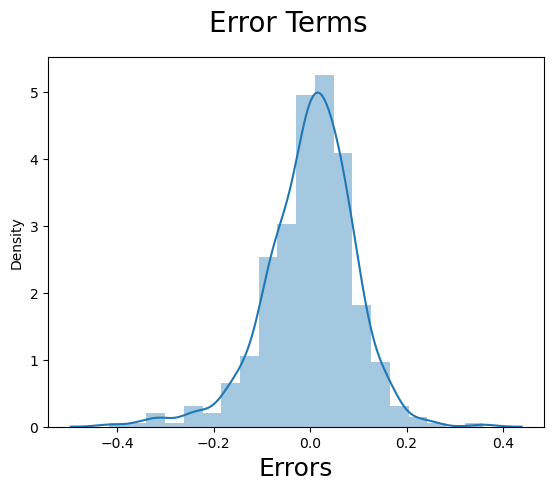

In [407]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

Error Terms are following Normal Distribution

### Step 6: Making Predictions using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [408]:
# Applying the scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [409]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Rain,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [410]:
X_test = bike_test
y_test = bike_test.pop('cnt')

In [411]:
col = X.columns
X_test = X_test[col]

# Adding a constant variable to test dataset

X_test_sm_20 = sm.add_constant(X_test)


In [412]:
y_pred = lr_model_20.predict(X_test_sm_20)

In [413]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

### Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

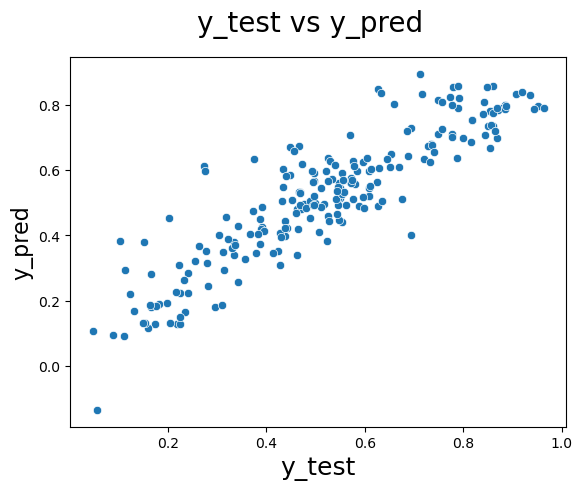

In [418]:
fig = plt.figure()
sns.scatterplot(x=y_test, y=y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [420]:
round(lr_model_20.params, 4)

const              0.1909
year               0.2341
holiday           -0.0963
temp               0.4777
windspeed         -0.1481
spring            -0.0554
summer             0.0621
winter             0.0945
september          0.0910
Light_Snow_Rain   -0.2850
Mist              -0.0787
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 0.1909 + 0.2341 * year - 0.0963 * holiday + 0.4777 * temp - 0.1481 * windspeed - 0.0554 * spring + 0.0621 * summer + 0.0945 * winter + 0.0910 * september - 0.2850 * Light_Snow_Rain - 0.0787 * Mist

Demand of bikes depend on year, holiday, temp, windspeed, spring, summer, winter, september, Light_Snow_Rain, Mist.